In [136]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn import metrics

from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.neural_network import MLPClassifier

import warnings 
warnings.simplefilter('ignore')

In [137]:
pwd_data = pd.read_csv("datasets/DSL-StrongPasswordData.csv", header = 0)
control_data = pd.read_csv("datasets/Control_Data.csv", header = 0)

In [138]:
print(pwd_data[DD_columns].info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   DD.period.t      20000 non-null  float64
 1   DD.t.i           20000 non-null  float64
 2   DD.i.e           20000 non-null  float64
 3   DD.e.five        20000 non-null  float64
 4   DD.five.Shift.r  20000 non-null  float64
 5   DD.Shift.r.o     20000 non-null  float64
 6   DD.o.a           20000 non-null  float64
 7   DD.a.n           20000 non-null  float64
 8   DD.n.l           20000 non-null  float64
 9   DD.l.Return      20000 non-null  float64
dtypes: float64(10)
memory usage: 1.5 MB
None


In [139]:
#Check on NaN
#print(pwd_data.isna().sum())

In [140]:
#Check on NULL
#print(pwd_data.isnull().sum())

In [141]:
#summary of dataset for columns, count, min, max values
DD_columns = [dd for dd in pwd_data.columns if dd.startswith('DD')]
print(control_data[DD_columns].describe())

       DD.period.t      DD.t.i      DD.i.e   DD.e.five  DD.five.Shift.r  \
count   400.000000  400.000000  400.000000  400.000000       400.000000   
mean      0.139243    0.118982    0.087617    0.182598         0.311943   
std       0.068609    0.050059    0.068388    0.115778         0.111343   
min       0.042400    0.003500    0.001400    0.038000         0.188200   
25%       0.096075    0.096600    0.058750    0.116750         0.244325   
50%       0.119550    0.112200    0.073900    0.157200         0.290250   
75%       0.158425    0.124675    0.091825    0.210850         0.342475   
max       0.485900    0.535800    0.718100    0.875900         1.303400   

       DD.Shift.r.o      DD.o.a      DD.a.n      DD.n.l  DD.l.Return  
count    400.000000  400.000000  400.000000  400.000000   400.000000  
mean       0.183442    0.139300    0.104452    0.151573     0.262381  
std        0.080719    0.053201    0.086515    0.105819     0.091004  
min        0.097900    0.050000    0.021

<Axes: title={'center': 'Average Keystroke Latency per Subject'}>

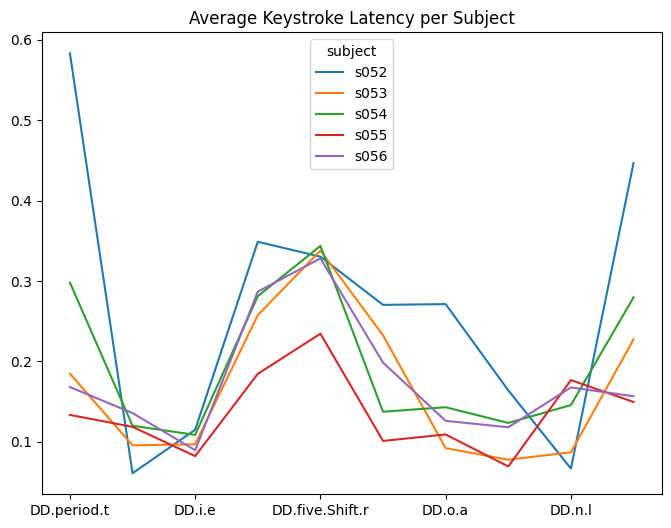

In [142]:
# Average Keystroke Latency per Subject

DD = [dd for dd in pwd_data.columns if dd.startswith('DD')]
plot = pwd_data[DD]
plot['subject'] = pwd_data['subject'].values
plot = plot.groupby('subject').mean()

plot.iloc[-5:].T.plot(figsize=(8, 6), title='Average Keystroke Latency per Subject')

In [143]:
data_train, data_test = train_test_split(pwd_data, test_size = 0.2, random_state=0)

X_train = data_train[pwd_data.columns[2:]]
y_train = data_train['subject']

X_test = data_test[pwd_data.columns[2:]]
y_test = data_test['subject']

In [144]:
#Adding control data
X_control = control_data.iloc[:, 2:]
y_control = control_data['subject']

In [145]:
knc = KNeighborsClassifier()
knc.fit(X_train, y_train)

y_pred = knc.predict(X_test)
#print(y_pred)
knc_accuracy = metrics.accuracy_score(y_test, y_pred)
print('K-Nearest Neighbor Classifier Accuracy:', knc_accuracy)

K-Nearest Neighbor Classifier Accuracy: 0.3685


In [146]:
# Checking on control data
control_pred = knc.predict(X_control)
#print(control_pred)
knc_accuracy = metrics.accuracy_score(y_control, control_pred)
print('K-Nearest Neighbor Classifier Accuracy:', knc_accuracy)

K-Nearest Neighbor Classifier Accuracy: 0.0


In [147]:
svc = svm.SVC(kernel='linear') 
svc.fit(X_train, y_train)

y_pred = svc.predict(X_test)

svc_accuracy = metrics.accuracy_score(y_test, y_pred)
print('Support Vector Linear Classifier Accuracy:', svc_accuracy)

Support Vector Linear Classifier Accuracy: 0.7785


In [148]:
#Checking on control data
control_pred = svc.predict(X_control)

svc_accuracy = metrics.accuracy_score(y_control, control_pred)
print('Support Vector Linear Classifier Accuracy:', svc_accuracy)

Support Vector Linear Classifier Accuracy: 0.0


In [149]:
mlpc = MLPClassifier()
mlpc.fit(X_train,y_train)

y_pred = mlpc.predict(X_test)

mlpc_accuracy = metrics.accuracy_score(y_test, y_pred)
print('Multi Layer Perceptron Classifier Accuracy:', mlpc_accuracy)

Multi Layer Perceptron Classifier Accuracy: 0.9095


In [150]:
#Checking on control data
control_pred = mlpc.predict(X_control)

mlpc_accuracy = metrics.accuracy_score(y_control, control_pred)
print('Multi Layer Perceptron Classifier Accuracy:', mlpc_accuracy)

Multi Layer Perceptron Classifier Accuracy: 0.0


Text(0, 0.5, 'True')

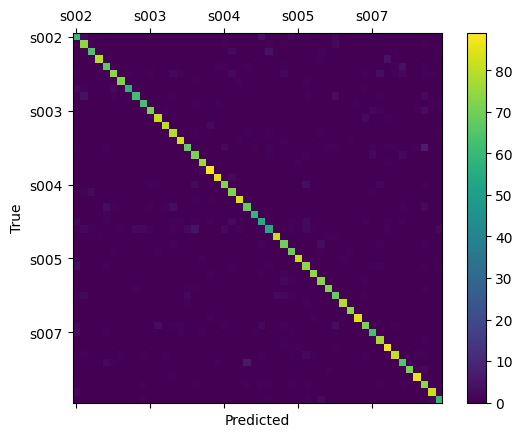

In [151]:
from sklearn.metrics import confusion_matrix

labels = list(pwd_data['subject'].unique())
cm = confusion_matrix(y_test, y_pred) 

figure = plt.figure()
axes = figure.add_subplot(111)
figure.colorbar(axes.matshow(cm))
axes.set_xticklabels([''] + labels)
axes.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')